In [1]:
import pandas as pd
import glob
import os
import tqdm
import gc
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import seaborn as sns
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import math
from sklearn import datasets, linear_model, model_selection
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
from tqdm import tqdm
from pandas import DataFrame
from sklearn.metrics import classification_report

In [ ]:
%matplotlib inline

In [ ]:
def make_data(dfs: DataFrame, names_list: list[str]):
    allinput = dfs[names_list]
    alloutput = dfs["gender"].apply(lambda x: int(x == "Male"))
    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(allinput, alloutput, test_size=0.2)
    return  X_train, X_test, Y_train, Y_test



In [5]:
def make_and_train_regress_model(X_train, Y_train):
    model = linear_model.LogisticRegression()
    model.fit(X_train, Y_train)
    return model

In [6]:
def make_report(Y_test, Y_test_predicted):
    [tn, fp], [fn, tp] = confusion_matrix(Y_test, Y_test_predicted)
    precision = tp / (tp + fp)
    recall = tp / tp + fn

    print("Precision: ", tp / (tp + fp))
    print("Recall: ", tp / (tp + fn))
    print("Accuracy: ", (tn + tp) / (tp + fp + tn + fn))
    print("F1: ",  (precision * recall) / ((precision) + recall))

In [ ]:
f='/content/athletes_sochi.txt'
dfs = pd.read_csv(f).dropna()

In [ ]:
dfs["BMI"] = dfs["weight"] / (dfs["height"]**2)
list_of_sports = list(dfs["sport"].unique())
dfs["code_sport"] = dfs["sport"].apply(lambda x: list_of_sports.index(x))

In [ ]:
X_train, X_test, Y_train, Y_test = make_data(dfs, ["code_sport", "height"])
model = make_and_train_regress_model(X_train, Y_train)
Y_test_predicted = model.predict(X_test)
make_report(Y_test, Y_test_predicted)

Precision:  0.8964401294498382
Recall:  0.920265780730897
Accuracy:  0.8870967741935484
F1:  0.8654086478380404


Задание 2


In [32]:
df_1 = pd.read_csv("/content/Вино белое.csv", sep=";").dropna()
df_1["wine_type"] = 0
df_2 = pd.read_csv("/content/Вино красное.csv", sep=";").dropna()
df_2["wine_type"] = 1
frames = [df_1, df_2]
df = pd.concat(frames)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [33]:
def make_data(dfs: DataFrame, names_list: list[str]):
    allinput = dfs[names_list]
    alloutput = dfs["wine_type"]
    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(allinput, alloutput, test_size=0.2)
    return  X_train, X_test, Y_train, Y_test

In [34]:
X_train, X_test, Y_train, Y_test = make_data(df, ["chlorides", "volatile acidity", "citric acid", "sulphates", "alcohol"])
model = make_and_train_regress_model(X_train, Y_train)
Y_test_predicted = model.predict(X_test)
report = classification_report(Y_test, model.predict(X_test), target_names=['white', 'red'])
print(report)

              precision    recall  f1-score   support

       white       0.92      0.96      0.94      1000
         red       0.86      0.74      0.79       300

    accuracy                           0.91      1300
   macro avg       0.89      0.85      0.87      1300
weighted avg       0.91      0.91      0.91      1300



2.2

In [114]:
from sklearn.cluster import Birch


X_train, X_test, Y_train, Y_test = make_data(df, ["chlorides", "volatile acidity", "citric acid", "sulphates", "alcohol"])

model = Birch(n_clusters=2)  # white or red
model.fit(X_train)

report = classification_report(Y_test, model.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       0.76      0.79      0.77      1004
           1       0.18      0.16      0.17       296

    accuracy                           0.64      1300
   macro avg       0.47      0.47      0.47      1300
weighted avg       0.63      0.64      0.64      1300



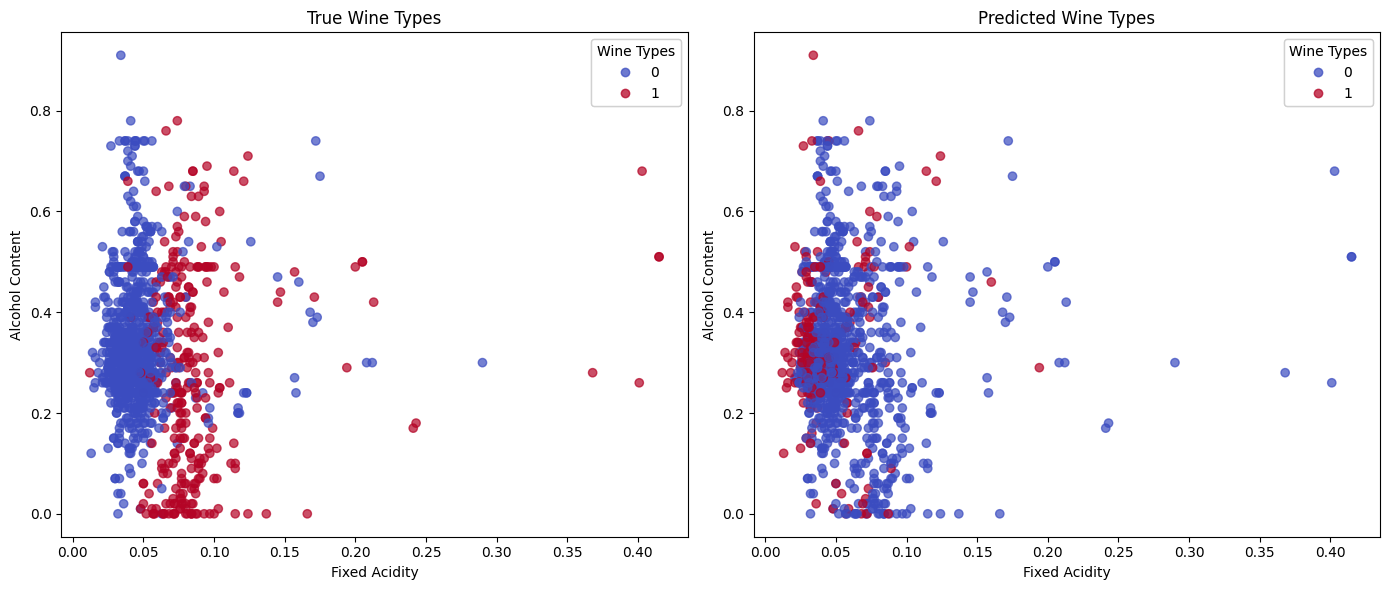

In [115]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Истинные метки
scatter = ax1.scatter(X_test['chlorides'], X_test['citric acid'], c=Y_test, cmap=plt.get_cmap('coolwarm'), alpha=0.7)
ax1.set_xlabel('chlorides')
ax1.set_ylabel('citric acid')
ax1.set_title('True Wine Types')
legend1 = ax1.legend(*scatter.legend_elements(), title="Wine Types")
ax1.add_artist(legend1)

# Предсказанные метки
scatter = ax2.scatter(X_test['chlorides'], X_test['citric acid'], c=model.predict(X_test), cmap=plt.get_cmap('coolwarm'), alpha=0.7)
ax2.set_xlabel('chlorides')
ax2.set_ylabel('citric acid')
ax2.set_title('Predicted Wine Types')
legend2 = ax2.legend(*scatter.legend_elements(), title="Wine Types")
ax2.add_artist(legend2)

# Отображение графиков
plt.tight_layout()
plt.show()


Выбор столбца "wine_type" в качестве целевой функции обусловлен тем, что нам интересно определить тип вина (красное или белое) на основе набора характеристик, или фич. Это поможет в производстве вин определить оптимальные параметры для производства одного или другого типа вина, что может привести к улучшению качества продукции, а также рационализации процесса производства.


1. Chlorides (хлориды) - это соли, содержащиеся в вине. Уровень хлоридов в вине влияет на его соленость и вкус. Обычно белое вино имеет меньше хлоридов, чем красное вино. Изучение этого параметра может помочь в определении, какой тип вина преобладает в зависимости от содержания хлоридов.

2. Volatile acidity (летучая кислотность) - это количество летучих кислот (в основном уксусной и молочной кислоты), присутствующих в вине. Этот параметр влияет на аромат и вкус вина. Высокая летучая кислотность может указывать на нежелательное присутствие бактерий, что может привести к появлению нежелательных запахов и вкусов. В белых винах летучая кислотность, как правило, ниже, чем в красных винах.

3. Citric acid (лимонная кислота) - это еще одна кислота, присутствующая в вине. Она влияет на вкус и свежесть вина. В целом, красные вина имеют более низкое содержание лимонной кислоты по сравнению с белыми винами. Изучение этого параметра также поможет определить тип вина.

4. Sulphates (сульфаты) - это соли сульфата, которые являются побочным продуктом процесса брожения. Сульфаты также используются как консерванты для предотвращения окисления вина и роста бактерий. Обычно красные вина содержат больше сульфатов, чем белые вина. Знание степени содержания сульфатов может помочь определить тип вина.

5. Alcohol (алкоголь) - это процентное содержание алкоголя в вине. Алкоголь влияет на вкус, качество и калорийность вина. В целом, красные вина имеют более высокий уровень алкоголя по сравнению с белыми винами. Изучение этого параметра также будет полезно для определения типа вина.



Польза от этой работы может быть в следующем:

1. Автоматизация процесса определения типа вина, что может сократить время и деньги, необходимые для анализа вина.
2. Создание рекомендательных систем для предложения типа вина в зависимости от предпочтений пользователя на основе его вкусовых и ароматических предпочтений.
3. Применение в производстве для контроля качества и сортировки вина по типам.
